<a href="https://colab.research.google.com/github/T-Dayaram/Python_Projects_DATA201/blob/main/TDayaram_Project3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [161]:
#Project 3: Analyze Department of Consumer & Worker Protection data
#Pick a feature/indicator & compare it to another
#Don't forget to do a little cleanup, a visualization, descriptive statistics and a summary

In [162]:
import pandas as pd
import matplotlib as plt
import numpy as np

DCWP = pd.read_csv("https://raw.githubusercontent.com/T-Dayaram/Python_Projects_DATA201/refs/heads/main/DCWP_Consumer_Complaints_20251219.csv")

DCWP.info()
DCWP.tail()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7221 entries, 0 to 7220
Data columns (total 19 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Record ID                  7221 non-null   object 
 1   Intake Date                7221 non-null   object 
 2   Intake Channel             7221 non-null   object 
 3   Business Category          7217 non-null   object 
 4   Complaint Code             6449 non-null   object 
 5   Business Unique ID         7033 non-null   object 
 6   Business Name              6902 non-null   object 
 7   Result Date                7221 non-null   object 
 8   Result                     7221 non-null   object 
 9   Referred To                2428 non-null   object 
 10  Contract Cancelled Amount  2 non-null      object 
 11  Refund Amount              103 non-null    object 
 12  Building Nbr               6080 non-null   object 
 13  Street1                    7109 non-null   objec

,Record ID,Intake Date,Intake Channel,Business Category,Complaint Code,Business Unique ID,Business Name,Result Date,Result,Referred To,Contract Cancelled Amount,Refund Amount,Building Nbr,Street1,Unit Type,Apt/Suite,City,Postcode,Borough
7216,065895-2025-CMPL,06/20/2025,Online,Landlord or Real Estate Agent,Broker Fee Listed,BA-1734209-2025,URBAN PADS LLC,07/17/2025,Complaint Review Complete,NaN,NaN,NaN,NaN,77 Rogers Ave,NaN,NaN,Brooklyn,11216.0,Brooklyn
7217,065912-2025-CMPL,06/20/2025,Online,Grocery-Retail,NaN,BA-1736357-2025,chick-fil-a,07/11/2025,Referred,Nassau County Consumer Affairs,NaN,NaN,1622,HEMPSTEAD TPKE,NaN,NaN,EAST MEADOW,11554.0,NaN
7218,065841-2025-CMPL,06/20/2025,311,Furniture Sales,Billing Dispute - B02; Overcharge,BA-1736192-2025,Adam's home furniture,07/23/2025,Requested Information Not Provided,NaN,NaN,NaN,365,E FORDHAM RD,NaN,NaN,BRONX,10458.0,Bronx
7219,065826-2025-CMPL,06/20/2025,Online,Landlord or Real Estate Agent,Broker Fee Listed,BA-1736026-2025,TRIBRO REALTY LLC,07/18/2025,Complaint Review Complete,NaN,NaN,NaN,1571,YORK AVE,APT,5S,NEW YORK,10028.0,Manhattan
7220,065913-2025-CMPL,06/20/2025,311,Third Party Food Delivery Service,Billing Dispute - B02,BA-1736358-2025,Door Dash,07/23/2025,Requested Information Not Provided,NaN,NaN,NaN,1,SOUTH ST,NaN,NaN,NEW YORK,10004.0,Manhattan


In [163]:
#Let's clean up those NaN values
DCWP = DCWP.fillna(0)
DCWP['Refund Amount'].dropna()

,Refund Amount
0,0
1,0
2,0
3,0
4,0
...,...
7216,0
7217,0
7218,0
7219,0


In [164]:
#And convert the columns we want into data we can use
DCWP['Business Category'].astype(str)
DCWP['Record ID'].astype(str)

,Record ID
0,074175-2025-CMPL
1,074138-2025-CMPL
2,074182-2025-CMPL
3,074104-2025-CMPL
4,074158-2025-CMPL
...,...
7216,065895-2025-CMPL
7217,065912-2025-CMPL
7218,065841-2025-CMPL
7219,065826-2025-CMPL


In [165]:
DCWP['Refund Amount'] = DCWP['Refund Amount'].str.replace('$', '')
DCWP['Refund Amount'] = DCWP['Refund Amount'].str.replace(',', '')
DCWP['Refund Amount'] = DCWP['Refund Amount'].fillna(0)
DCWP['Refund Amount'].astype(int)
DCWP['Refund Amount'].unique()

array([0, '4', '2000', '136', '980', '930', '950', '7', '800', '600',
       '3812', '12', '1500', '529', '48', '90', '249', '365', '24054',
       '300', '700', '3500', '299', '230', '419', '359', '120', '538',
       '40', '2', '194', '1', '135', '698', '50', '1550', '1000', '35',
       '163', '112', '1050', '79', '96', '39', '173', '200', '20', '354',
       '150', '15', '1460', '76', '6', '870', '175', '109', '2769',
       '4960', '49', '811', '32', '30', '174', '25', '433', '1092', '17',
       '400', '338', '4903', '100', '275', '242', '395', '1300', '450',
       '342', '322', '75', '218', '210', '1556', '9'], dtype=object)

In [166]:
#Every type of business in this sheet
DCWP['Business Category'].unique()

array(['Laundries', 'Other', 'Megastore', 'Landlord or Real Estate Agent',
       'General Vendor', 'Grocery-Retail', 'Electronic Cigarette Dealer',
       'Tow Truck Company', 'Salons And Barbershop',
       'Home Improvement Contractor', 'Restaurant', 'Retail Laundry',
       'Electronic & Home Appliance Service Dealer',
       'Specialized Vending License - MFV', 'Tobacco Retail Dealer',
       'Tax Preparers', 'Gas Station-Retail', 'Car Wash',
       'Stoop Line Stand', 'Garage & Parking Lot', 'Misc Non-Food Retail',
       'Auto Rental', 'Mini-Storage Company', 'Appliances', 'Supermarket',
       'Drug Store Retail', 'Secondhand Dealer - Auto', 'Hotel',
       'Booting Company', 'Pedicab Business', 'Ticket Seller Business',
       'Secondhand Dealer - General', 'Debt Collection Agency',
       'Storage Warehouse', 'Electronics Store',
       'Temporary Street Fair Vendor Permit', 'Newsstand', 'Locksmith',
       'Retail Store', 'Wearing Apparel', 'Jewelry Store-Retail',
       'Pr

In [167]:
#Drop any row where the business category is "other"
DCWP_Categorized = DCWP.drop(DCWP[DCWP['Business Category'] == 'Other'].index)
DCWP_Categorized

,Record ID,Intake Date,Intake Channel,Business Category,Complaint Code,Business Unique ID,Business Name,Result Date,Result,Referred To,Contract Cancelled Amount,Refund Amount,Building Nbr,Street1,Unit Type,Apt/Suite,City,Postcode,Borough
0,074175-2025-CMPL,09/22/2025,311,Laundries,Lost/Stolen/Damaged Property,BA-1748034-2025,ridgewood wash and fold,09/23/2025,Insufficient Info Received,0,0,0,452,WYCKOFF AVE,0,0,BROOKLYN,11237.0,Brooklyn
2,074182-2025-CMPL,09/22/2025,311,Megastore,Overcharge,BA-1748450-2025,Dollar General,09/26/2025,Insufficient Info Received,0,0,0,135,CANAL ST,0,0,STATEN ISLAND,10304.0,Staten Island
3,074104-2025-CMPL,09/22/2025,311,Landlord or Real Estate Agent,Required to Use Agent,0,0,09/29/2025,Complaint Review Complete,0,0,0,337,TOMPKINS AVE,0,0,BROOKLYN,11216.0,Brooklyn
4,074158-2025-CMPL,09/22/2025,311,General Vendor,Advertising/Misleading - A02,BA-1748100-2025,Nexus Travels,09/23/2025,Referred,NYC Department of Sanitation,0,0,1088,LIBERTY AVE,0,0,BROOKLYN,11208.0,Brooklyn
5,074173-2025-CMPL,09/22/2025,311,Grocery-Retail,Overcharge,BA-1748057-2025,Heavenly Market Inc,09/23/2025,Insufficient Info Received,0,0,0,58,CARMINE ST,0,0,NEW YORK,10014.0,Manhattan
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7216,065895-2025-CMPL,06/20/2025,Online,Landlord or Real Estate Agent,Broker Fee Listed,BA-1734209-2025,URBAN PADS LLC,07/17/2025,Complaint Review Complete,0,0,0,0,77 Rogers Ave,0,0,Brooklyn,11216.0,Brooklyn
7217,065912-2025-CMPL,06/20/2025,Online,Grocery-Retail,0,BA-1736357-2025,chick-fil-a,07/11/2025,Referred,Nassau County Consumer Affairs,0,0,1622,HEMPSTEAD TPKE,0,0,EAST MEADOW,11554.0,0
7218,065841-2025-CMPL,06/20/2025,311,Furniture Sales,Billing Dispute - B02; Overcharge,BA-1736192-2025,Adam's home furniture,07/23/2025,Requested Information Not Provided,0,0,0,365,E FORDHAM RD,0,0,BRONX,10458.0,Bronx
7219,065826-2025-CMPL,06/20/2025,Online,Landlord or Real Estate Agent,Broker Fee Listed,BA-1736026-2025,TRIBRO REALTY LLC,07/18/2025,Complaint Review Complete,0,0,0,1571,YORK AVE,APT,5S,NEW YORK,10028.0,Manhattan


<Axes: ylabel='Business Category'>

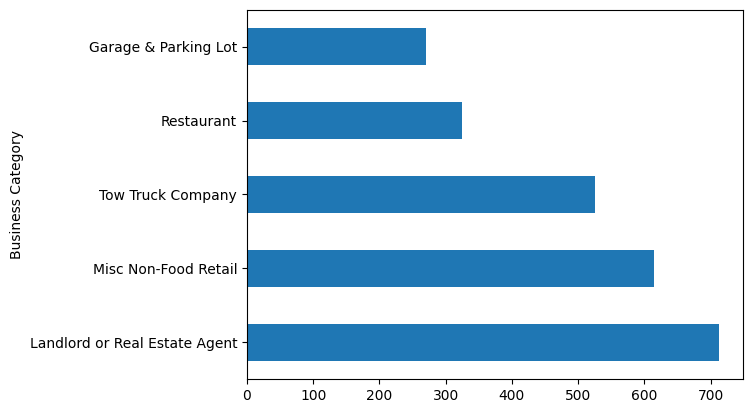

In [201]:
#Top 5 business categories with most complaints
DCWP_Top_5 = DCWP_Categorized['Business Category'].value_counts().head(5)
DCWP_Top_5.plot(kind='barh')

**Conclusion**

With more time and manipulation, this can show us more things such as which business category has the most refunds. On the surface, this could help local businesses and local patrons make more informed choices. As well as focus on making a more reputable business so as not to end up on such a list.

source: Open Data NYC